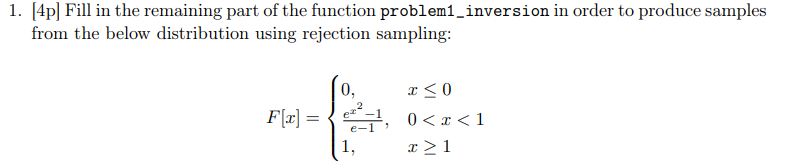

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.tree import DecisionTreeRegressor

# Task 1: Problem 1 - Rejection Sampling and Monte Carlo Integration
def prob_dens_function(x):
    return 2*x*np.exp(x**2)/(np.e -1)
def problem1_inversion(n_samples=1):
    """
    Samples from the given distribution using rejection sampling.
    """
    samples = []
    #Find normalizing M, maximum of function in interval given by x=1 -> 2e/(e-1)
    M = (2*np.e)/(np.e-1)
    print(M)
    while len(samples) < n_samples:
        randnum = np.random.uniform(0, 1)  # Sample from the uniform distribution
        prob_for_randnum = prob_dens_function(randnum)
        rx = prob_for_randnum / M
        if np.random.uniform(0, 1) <= rx:
            samples.append(randnum)
    return np.array(samples)



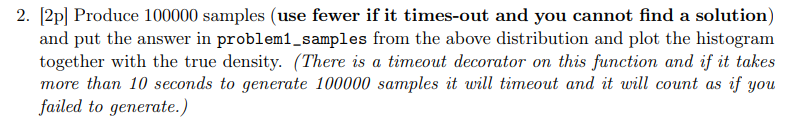

3.163953413738653


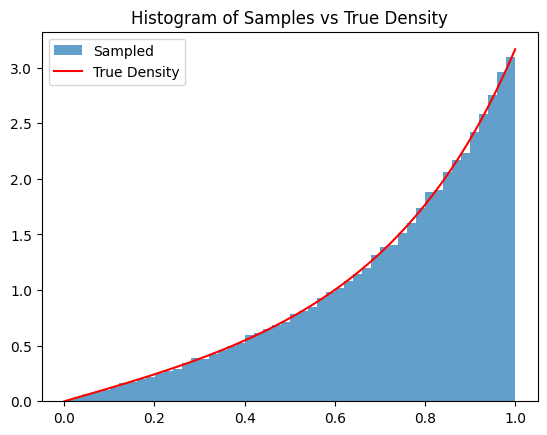

In [22]:

# Generate samples
problem1_samples = problem1_inversion(100000)
# Task 2: Plot histogram
plt.hist(problem1_samples, bins=50, density=True, alpha=0.7, label="Sampled")
x_vals = np.linspace(0, 1, 1000)
plt.plot(x_vals, prob_dens_function(x_vals), label="True Density", color="red")
plt.legend()
plt.title("Histogram of Samples vs True Density")
plt.show()

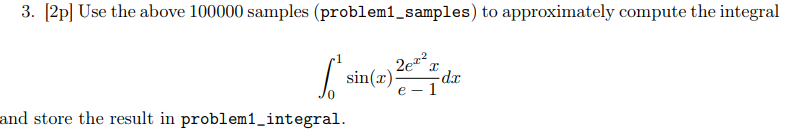

In [23]:

problem1_integral = np.mean(np.sin(problem1_samples))
print(problem1_integral)

0.6533985686267492


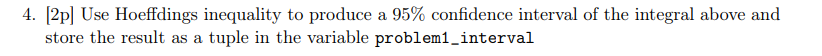

In [24]:

# Task 4: Hoeffding's Confidence Interval
n = len(problem1_samples)
#Know upper bound of random variable given when x=1 bc both components largest, this gives 
range_ = np.sin(1)*np.e*2/(np.e-1)  # Assume max-min range is within [0, 1] for simplicity
epsilon = np.sqrt((range_**2 * np.log(2 / 0.05)) / (2 * n))
problem1_interval = (problem1_integral - epsilon, problem1_integral + epsilon)

print("Integral approximation:", problem1_integral)
print("95% Confidence Interval:", problem1_interval)

Integral approximation: 0.6533985686267492
95% Confidence Interval: (np.float64(0.6419644824879875), np.float64(0.6648326547655108))


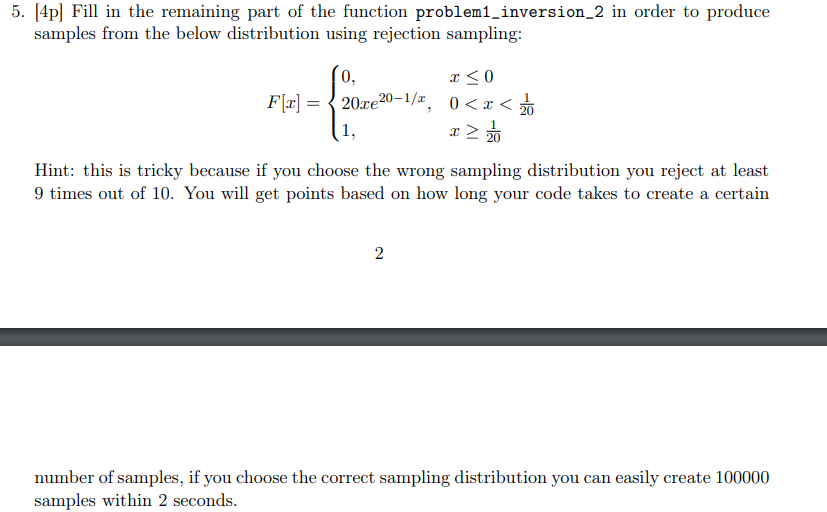

(array([1.34128834e-01, 0.00000000e+00, 0.00000000e+00, 1.34128834e-01,
        0.00000000e+00, 0.00000000e+00, 1.34128834e-01, 1.34128834e-01,
        0.00000000e+00, 0.00000000e+00, 1.34128834e-01, 1.34128834e-01,
        1.34128834e-01, 4.02386501e-01, 1.34128834e-01, 2.68257667e-01,
        1.34128834e-01, 5.36515335e-01, 2.68257667e-01, 6.70644168e-01,
        4.02386501e-01, 4.02386501e-01, 2.68257667e-01, 6.70644168e-01,
        4.02386501e-01, 8.04773002e-01, 8.04773002e-01, 5.36515335e-01,
        2.68257667e-01, 1.07303067e+00, 1.07303067e+00, 1.60954600e+00,
        9.38901835e-01, 2.01193250e+00, 2.68257667e+00, 2.41431901e+00,
        1.34128834e+00, 2.28019017e+00, 2.14606134e+00, 2.41431901e+00,
        3.48734967e+00, 2.54844784e+00, 4.02386501e+00, 4.42625151e+00,
        4.56038034e+00, 4.29212268e+00, 7.10882818e+00, 7.64534352e+00,
        8.58424535e+00, 7.10882818e+00, 8.85250302e+00, 1.07303067e+01,
        1.20715950e+01, 1.38152699e+01, 1.48883005e+01, 1.327875

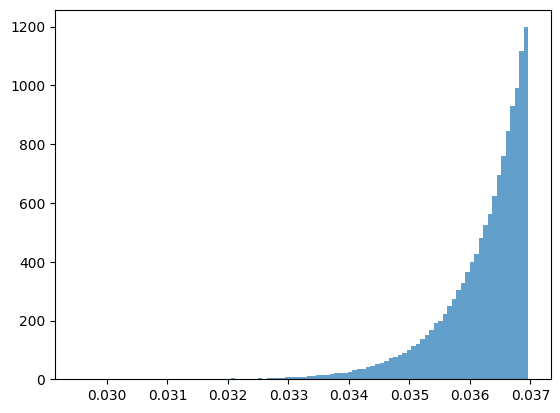

In [34]:

#TODO Still some error in inverse function
# Task 5: Problem 1 Inversion 2
def prob_dens_function(x):
    return 20*np.exp(20-1/x)*(x+1)/x

def problem1_inversion_2(n_samples=1):
    # Distribution from part 2
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections
    # Return a numpy array of length n_samples
    """
    Samples from the second distribution using rejection sampling.
    """
    
    new_list = []
    M = 1
    while len(new_list) < n_samples: 
        randnum = ((np.random.uniform(0,1)/420)**(1/20))/20  # Selecting random point
        prob_for_randnum = prob_dens_function(randnum) # finding prob for random point
        rx = prob_for_randnum / M # threshold to ensure holds
        if np.random.uniform(0, 1) <= rx:
            new_list.append(randnum)
    return np.array(new_list)
    
    # samples = []
    # while len(samples) < n_samples:
    #     x = np.random.uniform(0, 1)
    #     y = np.random.uniform(0, 20 * np.exp(20 - 1))
    #     if y <= 20 * x * np.exp(20 - 1 / x):
    #         samples.append(x)
    # return np.array(samples)

problem1_samples2 = problem1_inversion_2(100000)
plt.hist(problem1_samples2, bins=100, density=True, alpha=0.7, label="Sampled")


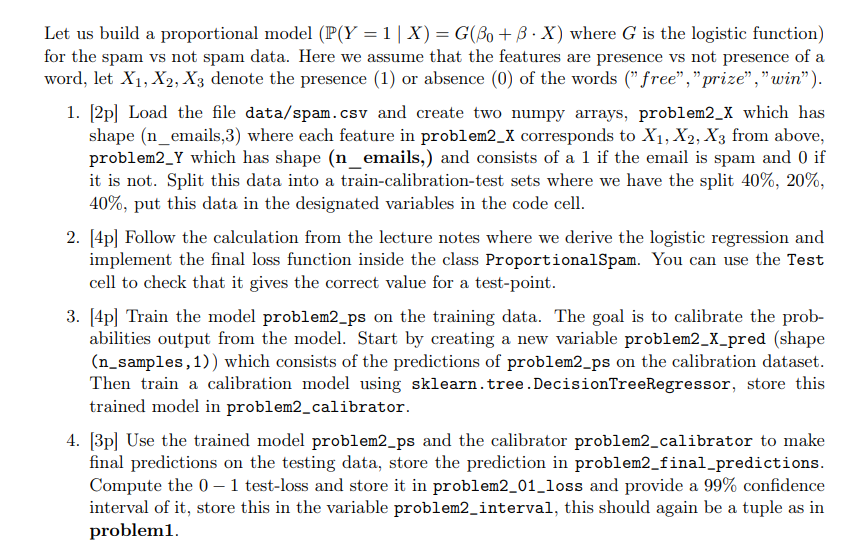

In [ ]:
#Shart fking bot ass lösningar

# Task 6: Problem 2 - Logistic Regression and Calibration
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
spam_data = pd.read_csv("data/spam.csv")
problem2_X = spam_data[["free", "prize", "win"]].values
problem2_Y = spam_data["spam"].values

# Task 7: Split data
problem2_X_train, temp_X, problem2_Y_train, temp_Y = train_test_split(problem2_X, problem2_Y, test_size=0.6)
problem2_X_calib, problem2_X_test, problem2_Y_calib, problem2_Y_test = train_test_split(temp_X, temp_Y, test_size=2/3)

class ProportionalSpam:
    def __init__(self):
        self.coeffs = None

    def loss(self, X, Y, coeffs):
        G = lambda z: 1 / (1 + np.exp(-z))
        logits = coeffs[0] + np.dot(X, coeffs[1:])
        predictions = G(logits)
        return -np.sum(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))

    def fit(self, X, Y):
        opt_loss = lambda coeffs: self.loss(X, Y, coeffs)
        initial_coeffs = np.zeros(X.shape[1] + 1)
        result = minimize(opt_loss, initial_coeffs, method='cg')
        self.coeffs = result.x

    def predict(self, X):
        if self.coeffs is not None:
            logits = self.coeffs[0] + np.dot(X, self.coeffs[1:])
            G = lambda z: 1 / (1 + np.exp(-z))
            return G(logits)
        else:
            return None

# Task 8: Train the logistic regression model
problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

# Task 9: Calibration
def calibrate_model(predictions, true_values):
    regressor = DecisionTreeRegressor()
    regressor.fit(predictions.reshape(-1, 1), true_values)
    return regressor

problem2_X_pred = problem2_ps.predict(problem2_X_calib)
problem2_calibrator = calibrate_model(problem2_X_pred, problem2_Y_calib)

# Task 10: Final Predictions and Confidence Interval
problem2_final_predictions = problem2_calibrator.predict(problem2_ps.predict(problem2_X_test).reshape(-1, 1))
problem2_01_loss = np.mean((problem2_final_predictions > 0.5) != problem2_Y_test)
n_test = len(problem2_Y_test)
epsilon_test = np.sqrt((np.log(2 / 0.01)) / (2 * n_test))
problem2_interval = (problem2_01_loss - epsilon_test, problem2_01_loss + epsilon_test)

print("Test Loss:", problem2_01_loss)
print("99% Confidence Interval for Test Loss:", problem2_interval)


In [46]:
#A  and D
import numpy as np

# ----------------------------------------------------------
# 1) Define the transition matrix P
#    States are ordered as [A, B, C, D]
# ----------------------------------------------------------
P = np.array([
    [0.8, 0.2, 0.0, 0.0],  # From A to (A,B,C,D)
    [0.6, 0.2, 0.2, 0.0],  # From B to (A,B,C,D)
    [0.0, 0.4, 0.0, 0.6],  # From C to (A,B,C,D)
    [0.0, 0.0, 0.8, 0.2]   # From D to (A,B,C,D)
])


# ----------------------------------------------------------
# 2) Compute the stationary distribution π
#    We want to solve πP = π and sum(π) = 1.
#    A common approach is to look for the left eigenvector
#    of P with eigenvalue 1, and then normalize it.
# ----------------------------------------------------------
def compute_stationary_distribution(P, tol=1e-12):
    """
    Returns the stationary distribution for a transition matrix P,
    assuming one exists and is unique.
    """
    # Transpose P so we look for right eigenvectors of P^T
    evals, evecs = np.linalg.eig(P.T)
    
    # Find the eigenvector corresponding to eigenvalue 1 (within a tolerance)
    idx_1 = None
    for i, val in enumerate(evals):
        if np.isclose(val, 1.0, atol=tol):
            idx_1 = i
            break
    
    if idx_1 is None:
        raise ValueError("No eigenvalue 1 found; cannot find stationary distribution.")
    
    # The corresponding eigenvector
    pi_vec = np.real(evecs[:, idx_1])
    
    # Normalize to make it a probability distribution (nonnegative & sums to 1)
    pi_vec = pi_vec / np.sum(pi_vec)
    
    # If there are negative entries due to numerical precision, clip them.
    pi_vec = np.clip(pi_vec, 0, None)
    pi_vec = pi_vec / np.sum(pi_vec)
    
    return pi_vec


# ----------------------------------------------------------
# 3) Check detailed balance condition
#    π(x) P(x,y) = π(y) P(y,x) for all x,y
# ----------------------------------------------------------
def check_reversibility(P, pi, tol=1e-12):
    """
    Checks whether the Markov chain with transition matrix P and 
    stationary distribution pi satisfies detailed balance.
    
    Returns True if reversible (i.e., satisfies detailed balance),
    otherwise False.
    """
    n = P.shape[0]
    for x in range(n):
        for y in range(n):
            lhs = pi[x] * P[x, y]  # π(x) P(x->y)
            rhs = pi[y] * P[y, x]  # π(y) P(y->x)
            if not np.isclose(lhs, rhs, atol=tol):
                return False
    return True


# ----------------------------------------------------------
# 4) Putting it all together
# ----------------------------------------------------------
if __name__ == "__main__":
    # Compute the stationary distribution
    pi_est = compute_stationary_distribution(P)
    
    # Print the result
    print("Transition Matrix (P):")
    print(P)
    print("\nComputed stationary distribution π:")
    for state_label, val in zip(["A", "B", "C", "D"], pi_est):
        print(f"  π({state_label}) = {val:.5f}")
    
    # Check reversibility
    is_rev = check_reversibility(P, pi_est)
    print("\nIs the chain reversible?", is_rev)


Transition Matrix (P):
[[0.8 0.2 0.  0. ]
 [0.6 0.2 0.2 0. ]
 [0.  0.4 0.  0.6]
 [0.  0.  0.8 0.2]]

Computed stationary distribution π:
  π(A) = 0.61538
  π(B) = 0.20513
  π(C) = 0.10256
  π(D) = 0.07692

Is the chain reversible? True


In [47]:
#A  and D
import numpy as np

# ----------------------------------------------------------
# 1) Define the transition matrix P
#    States are ordered as [A, B, C, D]
# ----------------------------------------------------------
P = np.array([
    [0.8, 0.2, 0.0, 0.0],  # From A to (A,B,C,D)
    [0.6, 0.2, 0.2, 0.0],  # From B to (A,B,C,D)
    [0.0, 0.4, 0.0, 0.6],  # From C to (A,B,C,D)
    [0.1, 0.0, 0.7, 0.2]   # From D to (A,B,C,D)
])


# ----------------------------------------------------------
# 2) Compute the stationary distribution π
#    We want to solve πP = π and sum(π) = 1.
#    A common approach is to look for the left eigenvector
#    of P with eigenvalue 1, and then normalize it.
# ----------------------------------------------------------
def compute_stationary_distribution(P, tol=1e-12):
    """
    Returns the stationary distribution for a transition matrix P,
    assuming one exists and is unique.
    """
    # Transpose P so we look for right eigenvectors of P^T
    evals, evecs = np.linalg.eig(P.T)
    
    # Find the eigenvector corresponding to eigenvalue 1 (within a tolerance)
    idx_1 = None
    for i, val in enumerate(evals):
        if np.isclose(val, 1.0, atol=tol):
            idx_1 = i
            break
    
    if idx_1 is None:
        raise ValueError("No eigenvalue 1 found; cannot find stationary distribution.")
    
    # The corresponding eigenvector
    pi_vec = np.real(evecs[:, idx_1])
    
    # Normalize to make it a probability distribution (nonnegative & sums to 1)
    pi_vec = pi_vec / np.sum(pi_vec)
    
    # If there are negative entries due to numerical precision, clip them.
    pi_vec = np.clip(pi_vec, 0, None)
    pi_vec = pi_vec / np.sum(pi_vec)
    
    return pi_vec


# ----------------------------------------------------------
# 3) Check detailed balance condition
#    π(x) P(x,y) = π(y) P(y,x) for all x,y
# ----------------------------------------------------------
def check_reversibility(P, pi, tol=1e-12):
    """
    Checks whether the Markov chain with transition matrix P and 
    stationary distribution pi satisfies detailed balance.
    
    Returns True if reversible (i.e., satisfies detailed balance),
    otherwise False.
    """
    n = P.shape[0]
    for x in range(n):
        for y in range(n):
            lhs = pi[x] * P[x, y]  # π(x) P(x->y)
            rhs = pi[y] * P[y, x]  # π(y) P(y->x)
            if not np.isclose(lhs, rhs, atol=tol):
                return False
    return True


# ----------------------------------------------------------
# 4) Putting it all together
# ----------------------------------------------------------
if __name__ == "__main__":
    # Compute the stationary distribution
    pi_est = compute_stationary_distribution(P)
    
    # Print the result
    print("Transition Matrix (P):")
    print(P)
    print("\nComputed stationary distribution π:")
    for state_label, val in zip(["A", "B", "C", "D"], pi_est):
        print(f"  π({state_label}) = {val:.5f}")
    
    # Check reversibility
    is_rev = check_reversibility(P, pi_est)
    print("\nIs the chain reversible?", is_rev)


Transition Matrix (P):
[[0.8 0.2 0.  0. ]
 [0.6 0.2 0.2 0. ]
 [0.  0.4 0.  0.6]
 [0.1 0.  0.7 0.2]]

Computed stationary distribution π:
  π(A) = 0.64516
  π(B) = 0.20430
  π(C) = 0.08602
  π(D) = 0.06452

Is the chain reversible? False
